# 1. Make an EDA process on the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

### Loading and reading dataset

In [4]:

encodings = ['utf-8', 'latin1', 'ISO-8859-1']

for encoding in encodings:
    try:
        df = pd.read_csv('ITBLogisticDataset.csv', encoding=encoding)
        print(f"File loaded successfully with encoding: {encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"Failed to load with encoding {encoding}: {e}")

if df is not None:
    print(df.head())
else:
    print("Failed to load the dataset with all attempted encodings.")

Failed to load with encoding utf-8: 'utf-8' codec can't decode byte 0xfa in position 2: invalid start byte
File loaded successfully with encoding: latin1
       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Cat

### Shape of the data

In [5]:
df.shape

(180519, 53)

### Data information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

### Descriptive statistics

In [7]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [8]:
df.columns.tolist()

['Type',
 'Days for shipping (real)',
 'Days for shipment (scheduled)',
 'Benefit per order',
 'Sales per customer',
 'Delivery Status',
 'Late_delivery_risk',
 'Category Id',
 'Category Name',
 'Customer City',
 'Customer Country',
 'Customer Email',
 'Customer Fname',
 'Customer Id',
 'Customer Lname',
 'Customer Password',
 'Customer Segment',
 'Customer State',
 'Customer Street',
 'Customer Zipcode',
 'Department Id',
 'Department Name',
 'Latitude',
 'Longitude',
 'Market',
 'Order City',
 'Order Country',
 'Order Customer Id',
 'order date (DateOrders)',
 'Order Id',
 'Order Item Cardprod Id',
 'Order Item Discount',
 'Order Item Discount Rate',
 'Order Item Id',
 'Order Item Product Price',
 'Order Item Profit Ratio',
 'Order Item Quantity',
 'Sales',
 'Order Item Total',
 'Order Profit Per Order',
 'Order Region',
 'Order State',
 'Order Status',
 'Order Zipcode',
 'Product Card Id',
 'Product Category Id',
 'Product Description',
 'Product Image',
 'Product Name',
 'Product P

### Check for missing values:

In [9]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


### Check duplicate values 

In [10]:
df.nunique()

Type                                  4
Days for shipping (real)              7
Days for shipment (scheduled)         4
Benefit per order                 21998
Sales per customer                 2927
Delivery Status                       4
Late_delivery_risk                    2
Category Id                          51
Category Name                        50
Customer City                       563
Customer Country                      2
Customer Email                        1
Customer Fname                      782
Customer Id                       20652
Customer Lname                     1109
Customer Password                     1
Customer Segment                      3
Customer State                       46
Customer Street                    7458
Customer Zipcode                    995
Department Id                        11
Department Name                      11
Latitude                          11250
Longitude                          4487
Market                                5


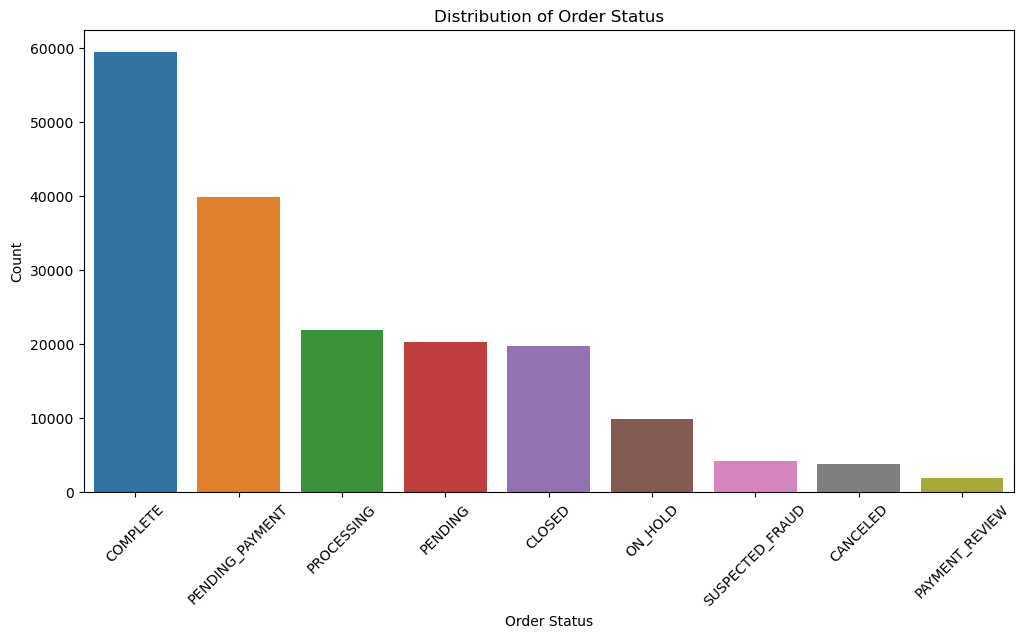

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Order Status', order=df['Order Status'].value_counts().index)
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


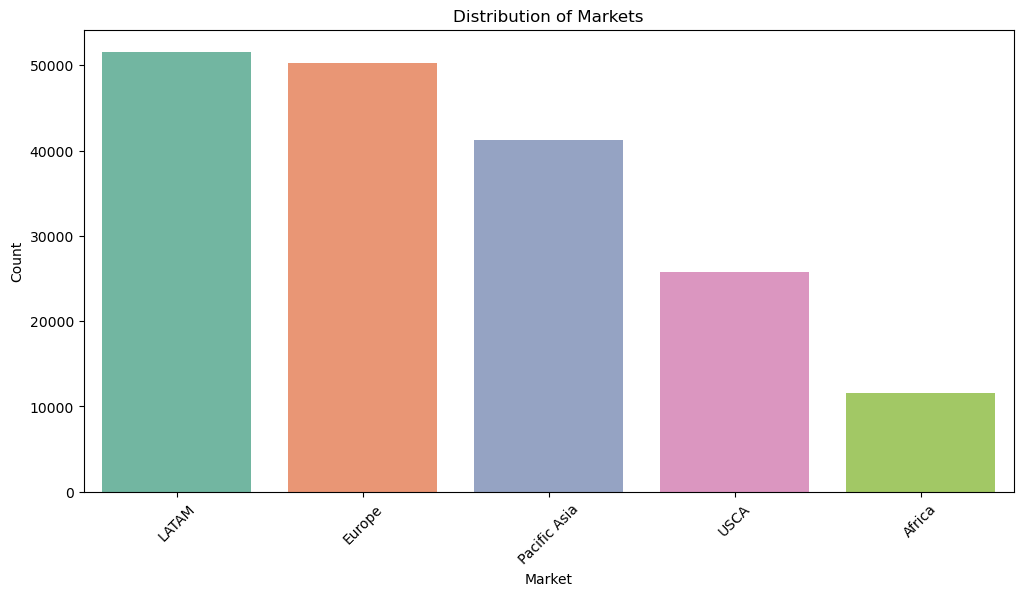

In [12]:
# Create the count plot for the 'Market' column
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Market', order=df['Market'].value_counts().index, palette='Set2')
plt.title('Distribution of Markets')
plt.xlabel('Market')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

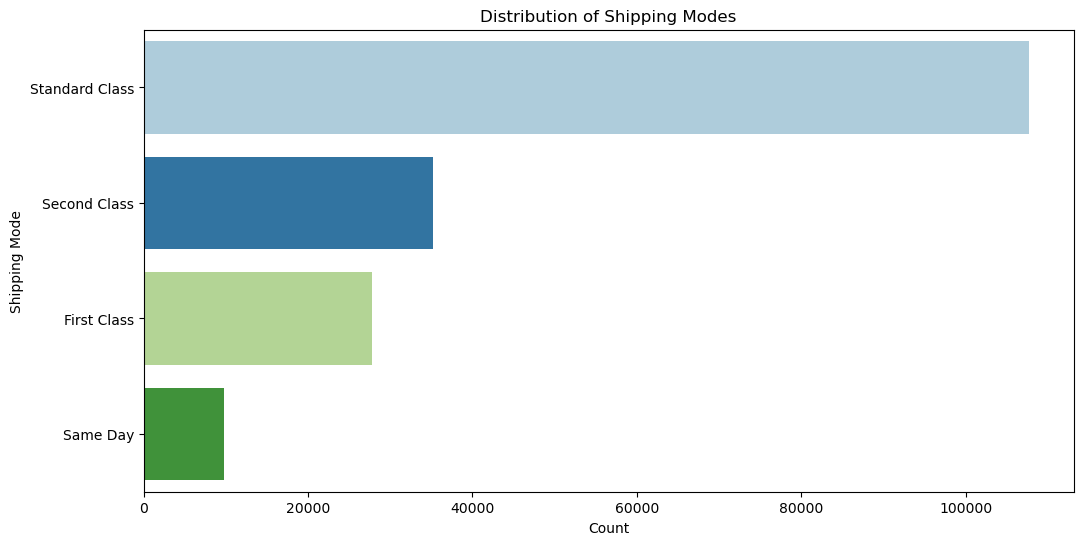

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Shipping Mode', order=df['Shipping Mode'].value_counts().index, palette='Paired')
plt.title('Distribution of Shipping Modes')
plt.xlabel('Count')
plt.ylabel('Shipping Mode')
plt.show()

### Delete Customer Password, Product Image, Product Description

In [14]:
df = df.drop(columns=['Customer Password', 'Product Image', 'Product Description', 'Customer Email'])

In [15]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,NaN,1360,73,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastán,PENDING,NaN,1360,73,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,NaN,1360,73,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,NaN,1360,73,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,NaN,1360,73,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


### 4. Our manager wants to classify the Order Regions based on the occurrence of late shipments and select the best Shipping Mode that consistently delivers shipments on time according to the schedule. Could you create a visualization that explores the relationship between them to provide insights for our manager's decision-making process?

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Handle missing values
df = df.dropna(subset=['Late_delivery_risk', 'Order Region', 'Shipping Mode'])

# Ensure 'Late_delivery_risk' is numeric and 'Order Region' and 'Shipping Mode' are categorical
df['Late_delivery_risk'] = df['Late_delivery_risk'].astype(int)
df['Order Region'] = df['Order Region'].astype(str)
df['Shipping Mode'] = df['Shipping Mode'].astype(str)

# Display the first few rows to ensure it's read correctly
print(df.head())

       Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goo

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Encode categorical variables
label_encoder_region = LabelEncoder()
df['Order Region Encoded'] = label_encoder_region.fit_transform(df['Order Region'])

label_encoder_shipping = LabelEncoder()
df['Shipping Mode Encoded'] = label_encoder_shipping.fit_transform(df['Shipping Mode'])

# Extract features and target variable
X = df[['Order Region Encoded', 'Shipping Mode Encoded']]
y = df['Late_delivery_risk']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)

# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)


In [33]:

# Print classification reports
print("Naive Bayes Classification Report")
print(classification_report(y_test, nb_y_pred))

print("Decision Tree Classification Report")
print(classification_report(y_test, dt_y_pred))


Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.62      0.82      0.70     24411
           1       0.80      0.58      0.67     29745

    accuracy                           0.69     54156
   macro avg       0.71      0.70      0.69     54156
weighted avg       0.72      0.69      0.69     54156

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.61      0.87      0.72     24411
           1       0.84      0.55      0.66     29745

    accuracy                           0.69     54156
   macro avg       0.72      0.71      0.69     54156
weighted avg       0.74      0.69      0.69     54156



<Figure size 1400x600 with 0 Axes>

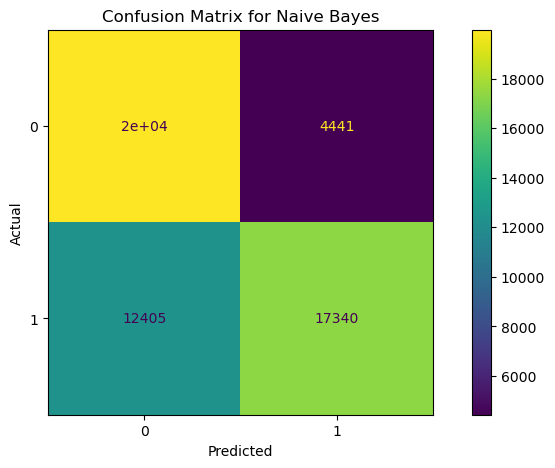

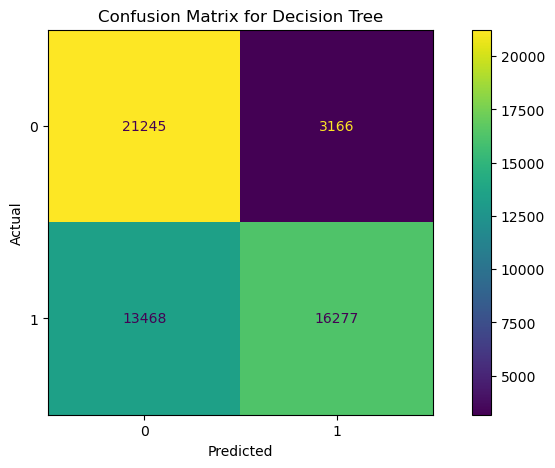

In [40]:

# Plot confusion matrices
plt.figure(figsize=(14, 6))
# Improved Confusion Matrix Visualization for Naive Bayes
fig, ax = plt.subplots(figsize=(10, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, nb_y_pred))
disp.plot(ax=ax, cmap='viridis')
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Improved Confusion Matrix Visualization for Decision Tree
fig, ax = plt.subplots(figsize=(10, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, dt_y_pred))
disp.plot(ax=ax, cmap='viridis')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.show()



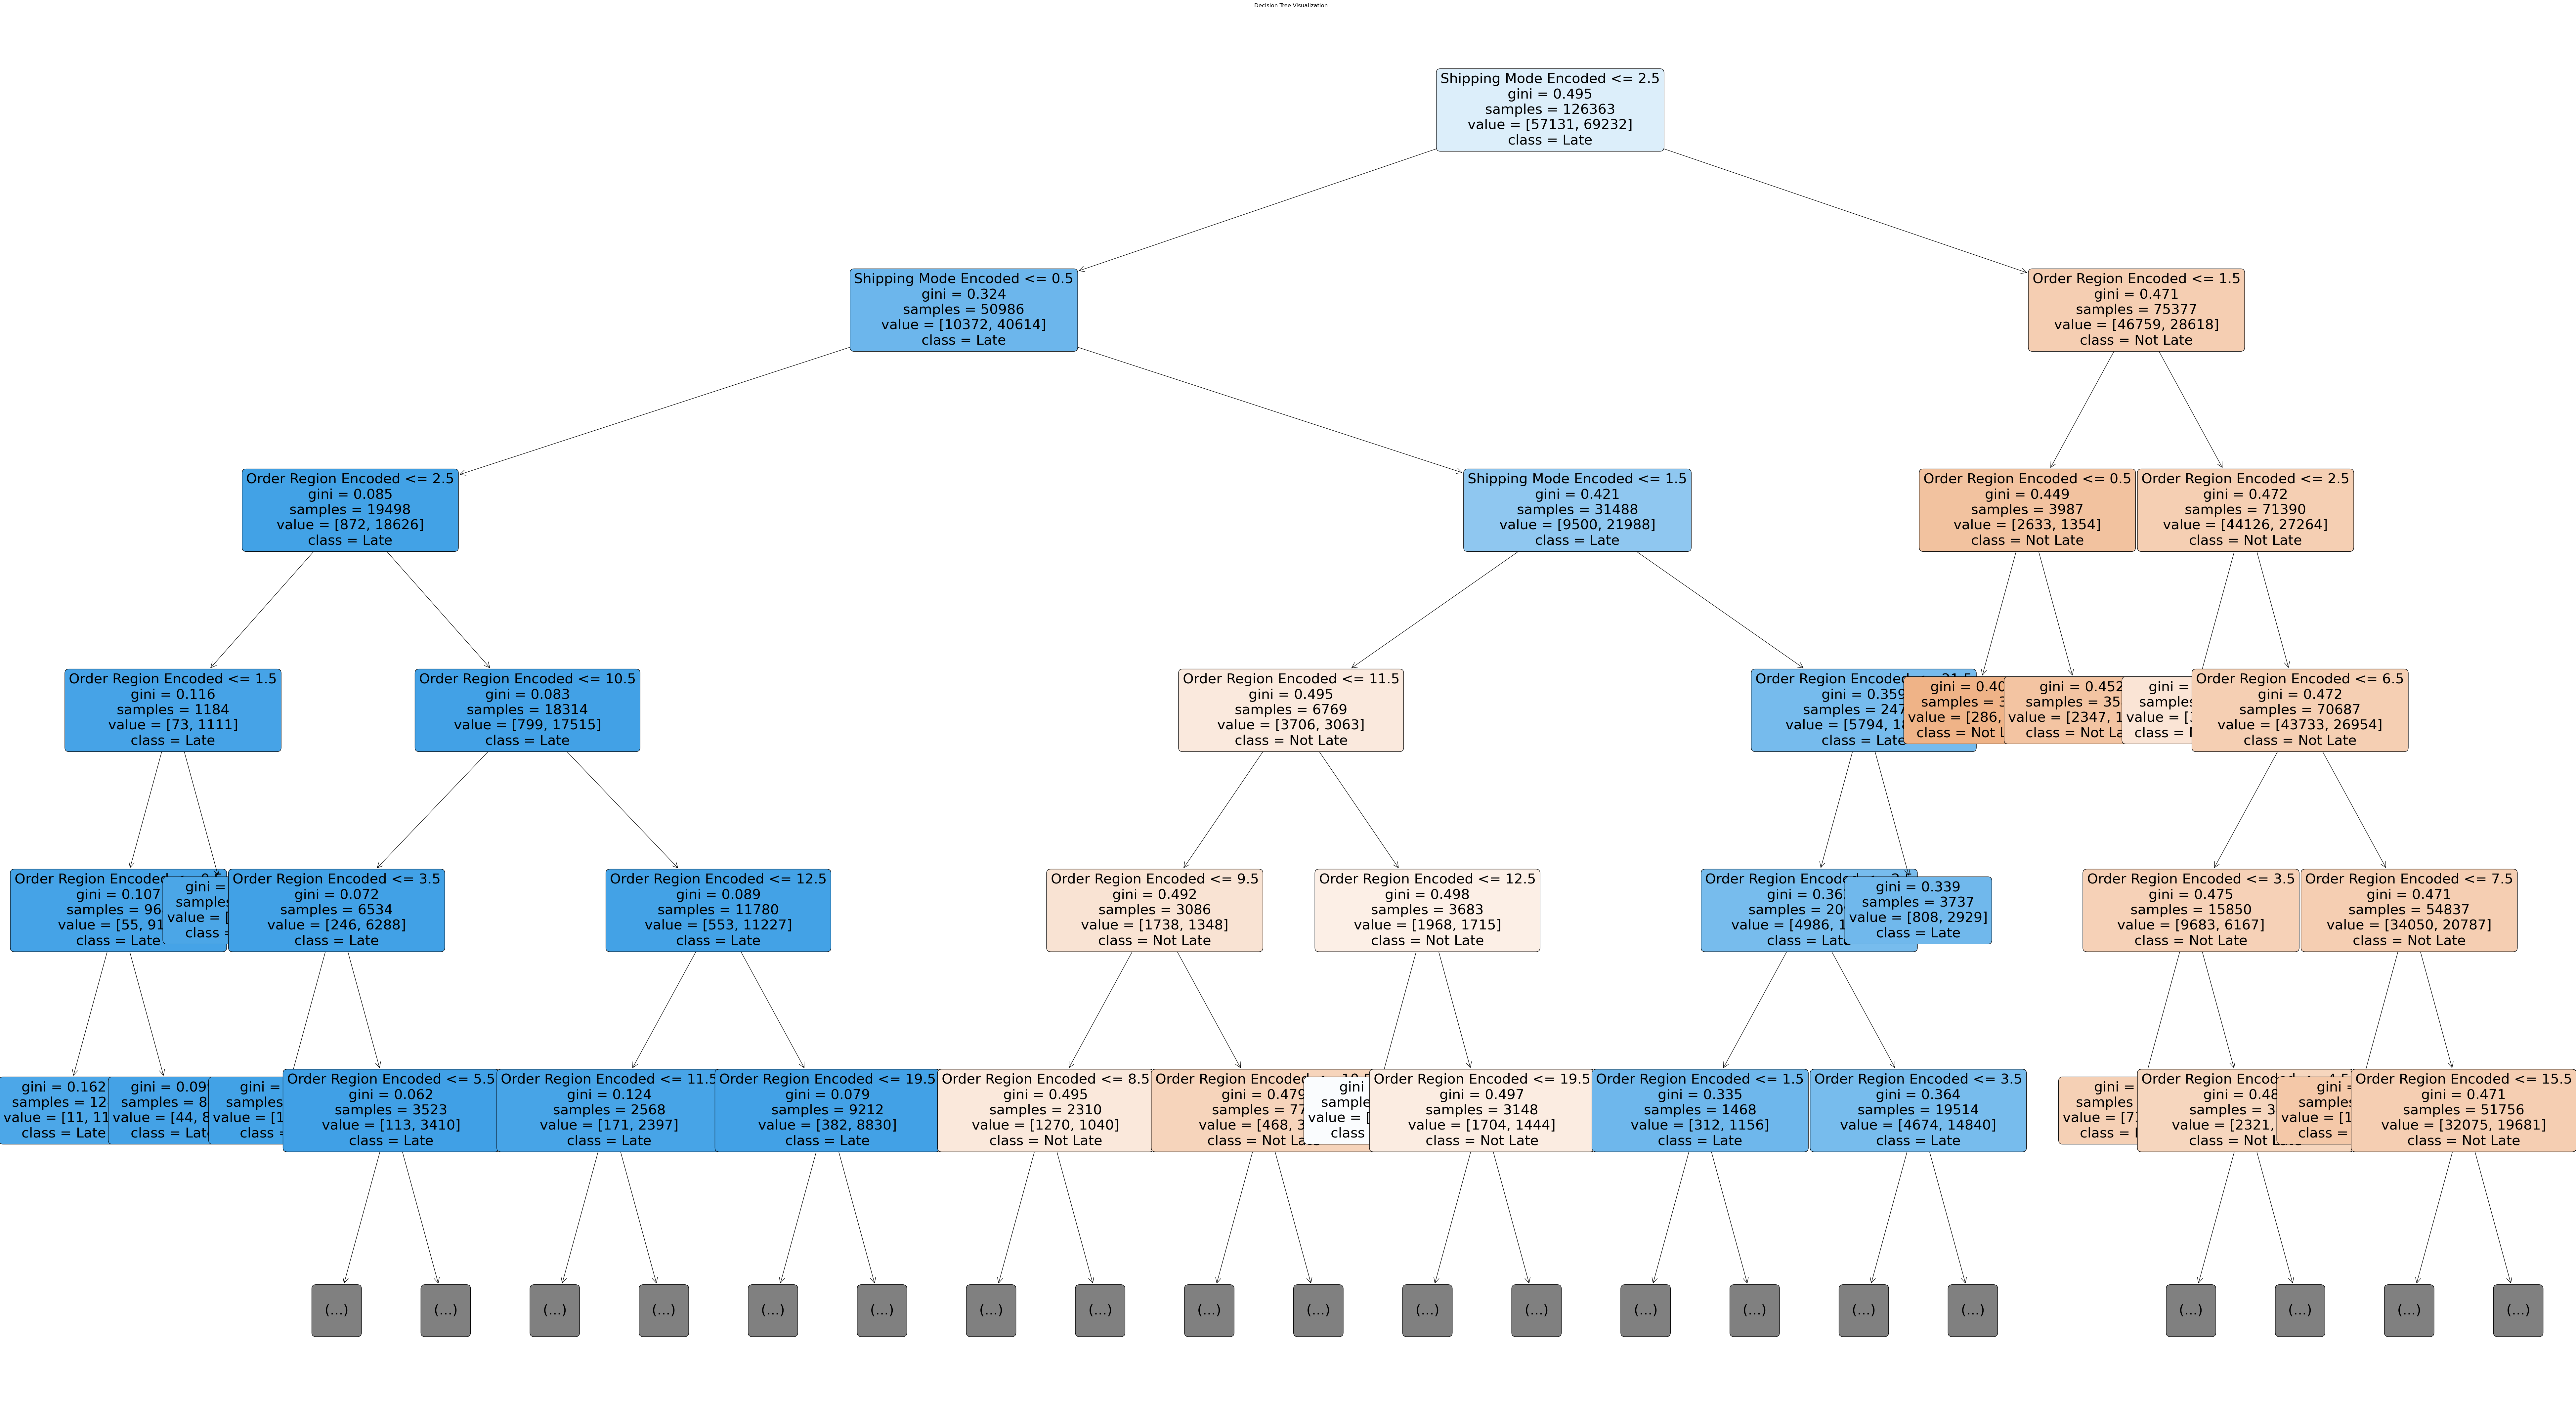

In [44]:
# Plot Decision Tree
plt.figure(figsize=(100, 55))
plot_tree(dt_model, max_depth=5, fontsize=30, filled=True, feature_names=X.columns, class_names=['Not Late', 'Late'], rounded=True)
plt.title('Decision Tree Visualization')
plt.show()